In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import bisect
sns.set()


In [3]:
def u(xi, a, k, m):
    """
    Menghitung nilai fungsi u(xi, a, k, m).

    Parameter:
    xi (float): Nilai input.
    a (float): Batas nilai.
    k (float): Konstanta.
    m (float): Pangkat.

    Returns:
    float: Nilai fungsi u(xi, a, k, m).
    """
    if xi > a:
        return k * ((xi - a) ** m)
    elif xi < -a:
        return k * ((-xi - a) ** m)
    return 0

# fungsi berikut merepresentasikan fungsi f 12 pada benchmark 
$$
F_{12}(x) = \pi n \left\{10 \sin(\pi y_1) + \sum_{i=-1}^{n} (y_i - 1)^2 [1 + 10 \sin^2(\pi y_{i+1})] + (y_n - 1)^2\right\} + \sum_{i=1}^{n} u(x_i, 10, 100, 4)
$$

In [6]:
def f12_function(x:np.array):
    """
    Menghitung nilai fungsi F12 berdasarkan vektor input x.

    Parameter:
    x (np.array): Vektor input.

    Return:
    float: Nilai fungsi F12 yang dihitung berdasarkan vektor input x.
    """
    n = len(x)
    y = x+1
    term1 = 10 * np.sin(np.pi * y[0])
    term2 = sum((y[:-1] - 1) ** 2 * (1 + 10 * (np.sin(np.pi * y[1:])** 2) ))
    term3 = (y[-1] - 1) ** 2
    sum_u = sum(u(xi, 10, 100, 4) for xi in x)
    
    return np.pi / n * (term1 + term2 + term3) + sum_u
    
    

In [4]:
x1 = np.arange(-10,8)
x2 = np.arange(-10,8)


In [5]:
pasangan = []
y_hasil= []

for i in x1:
    for j in x2:
        pasangan.append([i,j])
        y_hasil.append(f12_function(np.array([i,j])))

In [6]:
y_hasil

[314.1592653589793,
 284.3141351498763,
 257.610597594363,
 234.0486526924396,
 213.62830044410595,
 196.34954084936206,
 182.21237390820798,
 171.2167996206437,
 163.36281798666923,
 158.65042900628453,
 157.07963267948963,
 158.65042900628453,
 163.36281798666923,
 171.2167996206437,
 182.21237390820798,
 196.34954084936206,
 213.62830044410595,
 234.0486526924396,
 284.3141351498763,
 254.46900494077323,
 227.76546738526,
 204.20352248333654,
 183.78317023500293,
 166.50441064025907,
 152.367243699105,
 141.37166941154072,
 133.51768777756624,
 128.80529879718154,
 127.23450247038664,
 128.80529879718154,
 133.51768777756624,
 141.37166941154072,
 152.367243699105,
 166.50441064025907,
 183.78317023500293,
 204.20352248333654,
 257.610597594363,
 227.76546738526,
 201.06192982974676,
 177.4999849278233,
 157.07963267948966,
 139.8008730847458,
 125.66370614359172,
 114.66813185602744,
 106.81415022205297,
 102.10176124166827,
 100.53096491487337,
 102.10176124166827,
 106.8141502220

In [7]:
ind=y_hasil.index(min(y_hasil))

In [8]:
pasangan[ind]

[0, 0]

In [9]:
x_axes = [x[0] for x in pasangan]
z = [x[1] for x in pasangan]


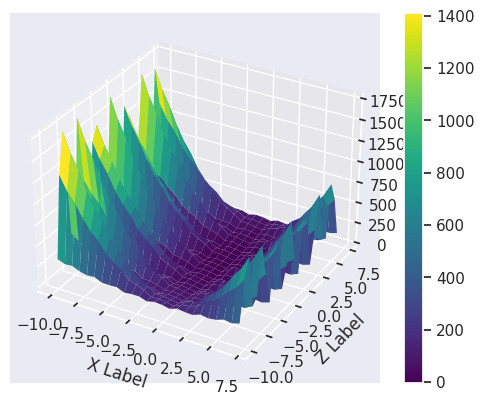

In [10]:
x = np.linspace(-10, 7, 25) 
z = np.linspace(-10, 7, 25) 

X, Y = np.meshgrid(x, z)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f12_function(np.array([X[i, j], Y[i, j]]))

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X Label')
ax.set_ylabel('Z Label')
ax.set_zlabel('Z Label')
fig.colorbar(surf)
plt.show()

In [12]:
class PSO:
    def __init__(self,objective_function, n_particles, n_dimensions, w, c1, c2, n_iterations,upper_bound,lower_bound):
        self.obj_function = objective_function
        self.n_particles = n_particles
        self.n_dimensions = n_dimensions
        self.w = w
        self.upper_bound = upper_bound
        self.lower_bound = lower_bound
        self.c1 = c1
        self.c2 = c2
        self.n_iterations = n_iterations
        self.pbest = np.zeros((n_particles, n_dimensions))
        self.gbest = np.zeros(n_dimensions)
        self.pbest_score = np.zeros(n_particles)
        self.gbest_score = math.inf
        self.particles = np.random.rand(n_particles, n_dimensions) * (self.upper_bound-self.lower_bound) + self.lower_bound
        self.velocities = np.zeros((n_particles, n_dimensions))
        self.history_particel = []
    
    def velocity(self,x):
        
        return self.w * x + self.c1 * np.random.rand() * (self.pbest - x) + self.c2 * np.random.rand() * (self.gbest - x)
    
    def position(self,x):
        return x + self.velocity(x)
    
    def fit(self):
        for i in range(self.n_iterations):
            for j in range(self.n_particles):
                score = self.obj_function(self.particles[j])
                if score < self.pbest_score[j]:
                    self.pbest_score[j] = score
                    self.pbest[j] = self.particles[j]
                if score < self.gbest_score:
                    self.gbest_score = score
                    self.gbest = self.particles[j]
            print(f"iterasi-{i+1} : global terbaik {self.gbest} score : {self.gbest_score} ")
            self.velocities = self.velocity(self.particles)
            self.particles = self.position(self.particles)
            self.history_particel.append(self.particles)
        return self.gbest
    

In [13]:
x_1 = [i for i in range(-10,8)]
x_2 = [i for i in range(-10,8)]

ruang_solusi = []
for i in x_1:
    for j in x_2:
        ruang_solusi.append([i,j])

In [14]:
pso = PSO(f12_function,10,2,1,1,1,100,7,-10)
pso.fit()

iterasi-1 : global terbaik [0.00577567 4.05072617] score : 25.48929038522167 
iterasi-2 : global terbaik [0.00577567 4.05072617] score : 25.48929038522167 
iterasi-3 : global terbaik [0.00577567 4.05072617] score : 25.48929038522167 
iterasi-4 : global terbaik [0.00577567 4.05072617] score : 25.48929038522167 
iterasi-5 : global terbaik [0.00577567 4.05072617] score : 25.48929038522167 
iterasi-6 : global terbaik [0.00577567 4.05072617] score : 25.48929038522167 
iterasi-7 : global terbaik [0.00577567 4.05072617] score : 25.48929038522167 
iterasi-8 : global terbaik [0.00577567 4.05072617] score : 25.48929038522167 
iterasi-9 : global terbaik [0.00577567 4.05072617] score : 25.48929038522167 
iterasi-10 : global terbaik [0.00577567 4.05072617] score : 25.48929038522167 
iterasi-11 : global terbaik [0.00577567 4.05072617] score : 25.48929038522167 
iterasi-12 : global terbaik [0.00577567 4.05072617] score : 25.48929038522167 
iterasi-13 : global terbaik [0.00577567 4.05072617] score : 2

array([-1.70955104,  3.02042808])

In [15]:
sol = pso.gbest
sol

array([-1.70955104,  3.02042808])

In [9]:
f12_function(np.array([0.57412774 ,  0.40633379]))

-9.730059757269936
3.3485739719809104
0.16510714889576403


-9.764664728012804

In [17]:
import numpy as np
import pyswarms as ps

def F12(x):
    n = x.shape[1]  # Ambil ukuran dimensi
    y = x + 1  # Transformasi x dengan menambahkan 1 ke setiap komponen
    sin_term = np.sin(np.pi * y[:, :-1])
    sin_next = np.sin(np.pi * y[:, 1:])
    term1 = 10 * sin_term[:, 0]
    term2 = np.sum((y[:, :-1] - 1)**2 * (1 + 10 * sin_next**2), axis=1)
    term3 = (y[:, -1] - 1)**2
    print(term2)
    total = (np.pi / n) * (term1 + term2 + term3)
    return total

# Setel opsi optimizer
options = {'c1': 1, 'c2': 1, 'w': 1}

# Buat instance Global Best PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Lakukan optimasi
cost, pos = optimizer.optimize(F12, iters=100)

print("Cost:", cost)
print("Best position:", pos)


2024-05-15 09:49:34,407 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1, 'c2': 1, 'w': 1}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-15.3
2024-05-15 09:49:34,669 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -15.274274317118937, best pos: [0.47661462 0.03066551]


Cost: -15.274274317118937
Best position: [0.47661462 0.03066551]


iterasi-1 : global terbaik [1.06721587 1.17892126] score : 12.346410547667304 
iterasi-2 : global terbaik [0.85457957 0.94402834] score : -4.031075325006477 
iterasi-3 : global terbaik [0.85457957 0.94402834] score : -4.031075325006477 
iterasi-4 : global terbaik [ 0.3077441  -0.03545213] score : -12.759735607767572 
iterasi-5 : global terbaik [ 0.3385185  -0.03899735] score : -13.520346625401658 
iterasi-6 : global terbaik [0.46748123 0.13732664] score : -14.652895190469279 
iterasi-7 : global terbaik [0.45068629 0.03065281] score : -15.169804766086724 
iterasi-8 : global terbaik [0.48076779 0.02212108] score : -15.297955107938602 
iterasi-9 : global terbaik [0.48076779 0.02212108] score : -15.297955107938602 
iterasi-10 : global terbaik [0.48076779 0.02212108] score : -15.297955107938602 
iterasi-11 : global terbaik [0.48076779 0.02212108] score : -15.297955107938602 
iterasi-12 : global terbaik [0.48076779 0.02212108] score : -15.297955107938602 
iterasi-13 : global terbaik [0.48076

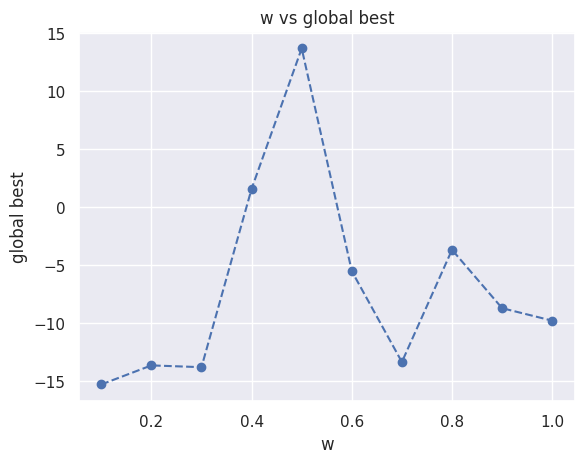

In [18]:
#w range 0.1 - 1 , c1 =1 , c2 = 1 , iterasi = 100 , partikel =10
w = [i/10 for i in range(1,11)]
hasil_w = []
for i in w:
    pso_w = PSO(f12_function,10,2,i,1,1,100,7,-10)
    pso_w.fit()
    hasil_w.append(pso_w.gbest_score)

#plot
plt.plot(w, hasil_w, linestyle='--', marker='o')
plt.xlabel("w")
plt.ylabel("global best")
plt.title("w vs global best")
plt.show()



iterasi-1 : global terbaik [0.80222417 0.18508234] score : -5.02963413870154 
iterasi-2 : global terbaik [0.80222417 0.18508234] score : -5.02963413870154 
iterasi-3 : global terbaik [0.80222417 0.18508234] score : -5.02963413870154 
iterasi-4 : global terbaik [0.80222417 0.18508234] score : -5.02963413870154 
iterasi-5 : global terbaik [0.80222417 0.18508234] score : -5.02963413870154 
iterasi-6 : global terbaik [0.80222417 0.18508234] score : -5.02963413870154 
iterasi-7 : global terbaik [0.80222417 0.18508234] score : -5.02963413870154 
iterasi-8 : global terbaik [0.80222417 0.18508234] score : -5.02963413870154 
iterasi-9 : global terbaik [0.80222417 0.18508234] score : -5.02963413870154 
iterasi-10 : global terbaik [0.80222417 0.18508234] score : -5.02963413870154 
iterasi-11 : global terbaik [0.80222417 0.18508234] score : -5.02963413870154 
iterasi-12 : global terbaik [0.80222417 0.18508234] score : -5.02963413870154 
iterasi-13 : global terbaik [0.80222417 0.18508234] score : -

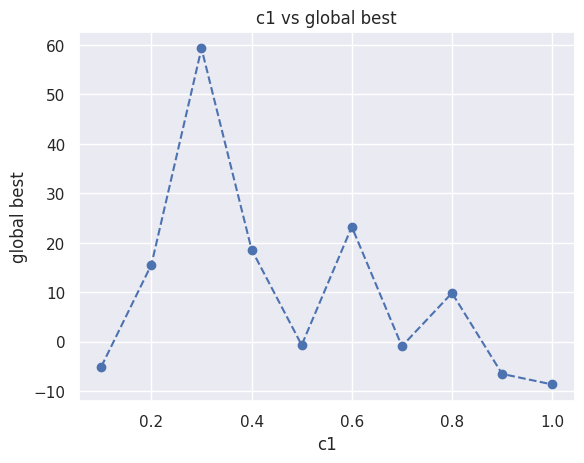

In [19]:
#c1 range 0.1 - 1 , c2 =1 , w = 1 , iterasi = 100 , partikel =10

c1 = [i/10 for i in range(1,11)]
hasil_c1 = []
for i in c1:
    pso_c1 = PSO(f12_function,10,2,1,i,1,100,7,-10)
    pso_c1.fit()
    hasil_c1.append(pso_c1.gbest_score)

#plot
plt.plot(c1, hasil_c1, linestyle='--', marker='o')
plt.xlabel("c1")
plt.ylabel("global best")
plt.title("c1 vs global best")
plt.show()

iterasi-1 : global terbaik [-1.66429962  3.46481086] score : 52.526492927158316 
iterasi-2 : global terbaik [-1.03792112  2.78646528] score : 18.560853547962466 
iterasi-3 : global terbaik [-1.25614082  2.99624317] score : 5.264370614067949 
iterasi-4 : global terbaik [-1.25614082  2.99624317] score : 5.264370614067949 
iterasi-5 : global terbaik [-1.25614082  2.99624317] score : 5.264370614067949 
iterasi-6 : global terbaik [-1.25614082  2.99624317] score : 5.264370614067949 
iterasi-7 : global terbaik [-1.25614082  2.99624317] score : 5.264370614067949 
iterasi-8 : global terbaik [-1.25614082  2.99624317] score : 5.264370614067949 
iterasi-9 : global terbaik [-1.25614082  2.99624317] score : 5.264370614067949 
iterasi-10 : global terbaik [-1.25614082  2.99624317] score : 5.264370614067949 
iterasi-11 : global terbaik [-1.25614082  2.99624317] score : 5.264370614067949 
iterasi-12 : global terbaik [-1.25614082  2.99624317] score : 5.264370614067949 
iterasi-13 : global terbaik [-1.256

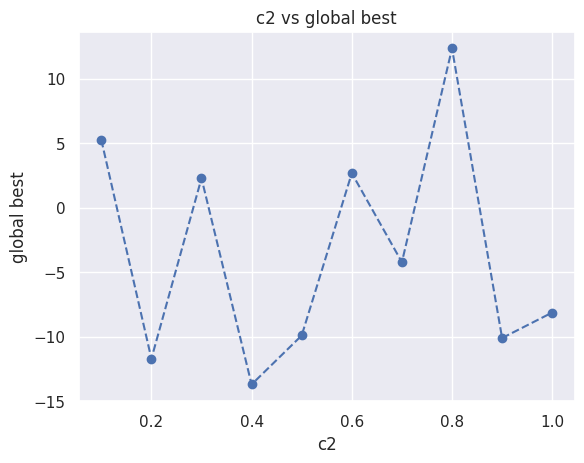

In [20]:
#c2 range 0.1 - 1 , c1 =1 , w = 1 , iterasi = 100 , partikel =10

c2 = [i/10 for i in range(1,11)]
hasil_c2 = []
for i in c2:
    pso_c2 = PSO(f12_function,10,2,i,1,1,100,7,-10)
    pso_c2.fit()
    hasil_c2.append(pso_c2.gbest_score)

#plot
plt.plot(c2, hasil_c2, linestyle='--', marker='o')
plt.xlabel("c2")
plt.ylabel("global best")
plt.title("c2 vs global best")
plt.show()

iterasi-1 : global terbaik [-1.62604538  0.9217189 ] score : -6.543082055637991 
iterasi-2 : global terbaik [-1.62604538  0.9217189 ] score : -6.543082055637991 
iterasi-3 : global terbaik [-1.62604538  0.9217189 ] score : -6.543082055637991 
iterasi-4 : global terbaik [-1.62604538  0.9217189 ] score : -6.543082055637991 
iterasi-5 : global terbaik [-1.62604538  0.9217189 ] score : -6.543082055637991 
iterasi-6 : global terbaik [-1.62604538  0.9217189 ] score : -6.543082055637991 
iterasi-7 : global terbaik [-1.62604538  0.9217189 ] score : -6.543082055637991 
iterasi-8 : global terbaik [-1.62604538  0.9217189 ] score : -6.543082055637991 
iterasi-9 : global terbaik [-1.62604538  0.9217189 ] score : -6.543082055637991 
iterasi-10 : global terbaik [-1.62604538  0.9217189 ] score : -6.543082055637991 
iterasi-1 : global terbaik [-0.21033939  1.48394246] score : 13.86246851455726 
iterasi-2 : global terbaik [-0.21033939  1.48394246] score : 13.86246851455726 
iterasi-3 : global terbaik [-

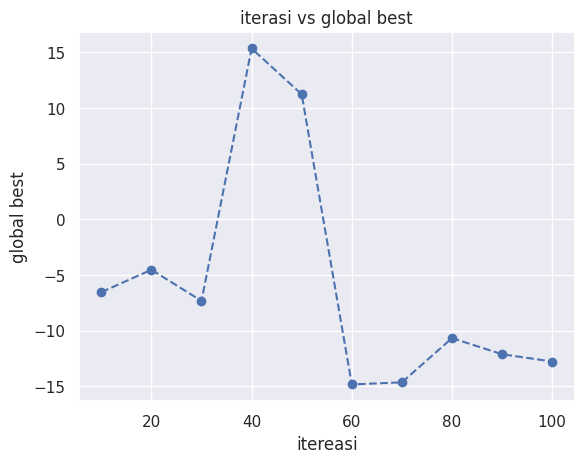

In [21]:
#w =1 , c1 =1 , c2 = 1 , iterasi = 100, iterasi 10 -100 , partikel =10
iter = [i*10 for i in range(1,11)]
hasil_iter = []

for i in iter:
    pso_iter = PSO(f12_function,10,2,1,1,1,int(i),7,-10)
    pso_iter.fit()
    hasil_iter.append(pso_iter.gbest_score)

#plot
plt.plot(iter, hasil_iter, linestyle='--', marker='o')
plt.xlabel("itereasi")
plt.ylabel("global best")
plt.title("iterasi vs global best")
plt.show()

iterasi-1 : global terbaik [2.56944949 0.04603703] score : -2.8075400177216276 
iterasi-2 : global terbaik [2.56944949 0.04603703] score : -2.8075400177216276 
iterasi-3 : global terbaik [2.56944949 0.04603703] score : -2.8075400177216276 
iterasi-4 : global terbaik [2.56944949 0.04603703] score : -2.8075400177216276 
iterasi-5 : global terbaik [2.56944949 0.04603703] score : -2.8075400177216276 
iterasi-6 : global terbaik [2.56944949 0.04603703] score : -2.8075400177216276 
iterasi-7 : global terbaik [2.56944949 0.04603703] score : -2.8075400177216276 
iterasi-8 : global terbaik [2.56944949 0.04603703] score : -2.8075400177216276 
iterasi-9 : global terbaik [2.56944949 0.04603703] score : -2.8075400177216276 
iterasi-10 : global terbaik [2.56944949 0.04603703] score : -2.8075400177216276 
iterasi-11 : global terbaik [2.56944949 0.04603703] score : -2.8075400177216276 
iterasi-12 : global terbaik [2.56944949 0.04603703] score : -2.8075400177216276 
iterasi-13 : global terbaik [2.569449

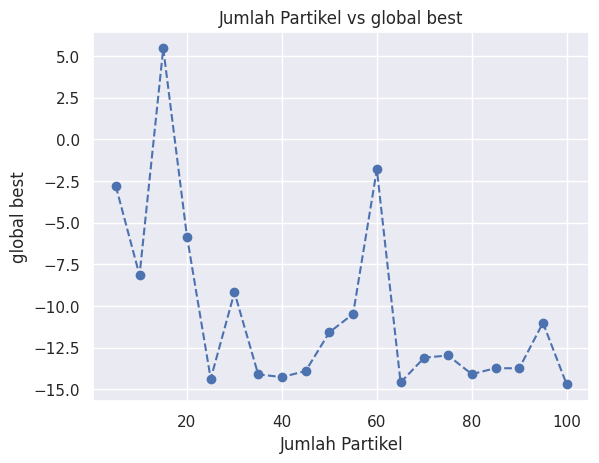

In [22]:
#w = 1 , c1 =1 , c2 = 1 , iterasi = 100, iterasi = 100 , partikel 5 -100
parti = [i*5 for i in range(1,21)]
hasil_parti = []

for i in parti:
    pso_parti = PSO(f12_function,int(i),2,1,1,1,100,7,-10)
    pso_parti.fit()
    hasil_parti.append(pso_parti.gbest_score)

#plot
plt.plot(parti, hasil_parti, linestyle='--', marker='o')
plt.xlabel("Jumlah Partikel")
plt.ylabel("global best")
plt.title("Jumlah Partikel vs global best")
plt.show()

In [23]:
"""_summary_
parameter optimal pso
c1 : 0.6
c2 : 0.7
w : 0.5
iterasi : 50
jumlah partikel : 70
"""

pso2 = PSO(f12_function,70,2,0.5,0.6,0.7,50,7,-10)
pso2.fit()

iterasi-1 : global terbaik [ 0.67523075 -0.68149006] score : -6.8663840104783 
iterasi-2 : global terbaik [ 0.67523075 -0.68149006] score : -6.8663840104783 
iterasi-3 : global terbaik [ 0.67523075 -0.68149006] score : -6.8663840104783 
iterasi-4 : global terbaik [ 0.3805923  -1.00421829] score : -12.803622812722107 
iterasi-5 : global terbaik [ 0.3805923  -1.00421829] score : -12.803622812722107 
iterasi-6 : global terbaik [ 0.3805923  -1.00421829] score : -12.803622812722107 
iterasi-7 : global terbaik [0.40334505 0.96828061] score : -13.235777058115966 
iterasi-8 : global terbaik [0.40334505 0.96828061] score : -13.235777058115966 
iterasi-9 : global terbaik [0.40334505 0.96828061] score : -13.235777058115966 
iterasi-10 : global terbaik [ 0.51193966 -0.20111346] score : -13.785680090013365 
iterasi-11 : global terbaik [0.35049662 0.02693422] score : -13.799114779673133 
iterasi-12 : global terbaik [0.52574493 0.04040133] score : -15.150298599903984 
iterasi-13 : global terbaik [0.5

array([0.52574493, 0.04040133])

iterasi-1 : global terbaik [ 0.39080247 -0.78741632] score : -12.658748706172293 
iterasi-2 : global terbaik [ 0.39080247 -0.78741632] score : -12.658748706172293 
iterasi-3 : global terbaik [ 0.39080247 -0.78741632] score : -12.658748706172293 
iterasi-4 : global terbaik [ 0.39080247 -0.78741632] score : -12.658748706172293 
iterasi-5 : global terbaik [ 0.39080247 -0.78741632] score : -12.658748706172293 
iterasi-6 : global terbaik [ 0.39080247 -0.78741632] score : -12.658748706172293 
iterasi-7 : global terbaik [ 0.39080247 -0.78741632] score : -12.658748706172293 
iterasi-8 : global terbaik [ 0.39080247 -0.78741632] score : -12.658748706172293 
iterasi-9 : global terbaik [ 0.39080247 -0.78741632] score : -12.658748706172293 
iterasi-10 : global terbaik [ 0.39080247 -0.78741632] score : -12.658748706172293 
iterasi-11 : global terbaik [ 0.39080247 -0.78741632] score : -12.658748706172293 
iterasi-12 : global terbaik [ 0.39080247 -0.78741632] score : -12.658748706172293 
iterasi-13 : 

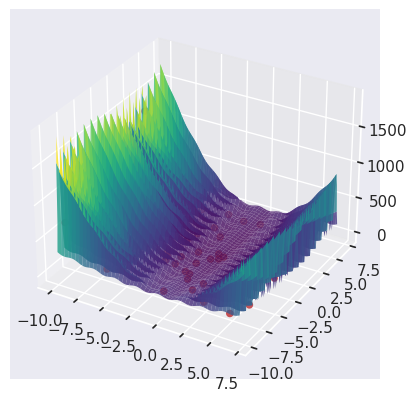

In [24]:
x = np.linspace(-10, 7, 100)
y = np.linspace(-10, 7, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([f12_function(np.array([xi, yi])) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
pso3 = PSO(f12_function,70,2,0.5,0.6,0.7,50,7,-10)
points = ax.scatter(pso3.particles[:, 0], pso3.particles[:, 1], [f12_function(p) for p in pso3.particles], color='r')
pso3.fit()
list_poin = pso3.history_particel


def update(frame):
    titik_poin = list_poin[frame]
    print(titik_poin)
    points._offsets3d = (titik_poin[:, 0], titik_poin[:, 1], [f12_function(p) for p in titik_poin])
    return points,

ani = FuncAnimation(fig, update, frames=np.arange(len(list_poin)), interval=100,)
plt.show()

#Laporan hasil percobaan 
hyperparameter yang optimal untuk PSO pada kasus f12 ini adalah :

parameter optimal pso
c1 : 0.6
c2 : 0.7
w : 0.5
iterasi : 50
jumlah partikel : 70

ini didapatkan dengan melihat grafik hasil uji pada masing-masing parameter , dititik mana parameter yang sedang dioptimalkan optimal. 

dengan parameter tersebut di dapatkan titik optimalnya ada di titil (0.37477075, -1.0018905) dengan score nya -12.710490531744775

JIka mengacu pada dokumentassi di matlab, score untuk optimum global ada pada titik 0,0 dengan score 0 
namun pada percobaan kali ini yang di dapatkan titik optimalnya 0.3747,-1,00 dengan score -12.7
sejujurnya jika diamati secara intuisi jika range kontinyu bukan integer diantara -10,7 kita akan dapati bahwa akan ada score minus ketika persamaan $$ 10 \sin(\pi y_1)$$ ketika 2>y_1 > 1 diamana menghasilkan sinus negatif yang tinggi. Yang menyebabkan nilainya menjadi negatif secara keseluruhan fungsi karena elemen persamaan lainnya tidak cukup mengimbanginya. Namun jika ruang solusi dibatasi pada bilagan bulat saja maka akan di dapatkan titik optimumnya pada titik 0,0. 

Meskipun demikian jikapun ruang solkusi ini kontinyu , hasil dari PSO belum cukup optimal meski sudah cukup baik, karena masih ada titik optimal lainnya yang lebih kecil. Penyebab PSO belum mencapai titik optimalnya dikarenakan configuration hyperparameter yang belum cukup optimal. Hyperparameter ini salah satunya adalah jumlah iterasi, jumlah partikel yang digenerate dll. 

In [5]:
#ACO 
class ACO:
    def __init__(self, alpha,beta,rho,n_ants,n_iterations,n_kota, ruang_solusi, funtion_obj):
        """
        Inisialisasi objek ACO (Ant Colony Optimization).

        Parameters:
        - alpha (float): Nilai alpha untuk mengontrol pengaruh feromon.
        - beta (float): Nilai beta untuk mengontrol pengaruh jarak.
        - rho (float): Nilai rho untuk mengontrol penguapan feromon.
        - n_ants (int): Jumlah semut yang akan digunakan.
        - n_iterations (int): Jumlah iterasi yang akan dilakukan.
        - n_kota (int): Jumlah kota yang ada.
        - ruang_solusi (list): Daftar kota yang akan dijadikan ruang solusi.
        - funtion_obj (function): Fungsi objektif yang akan dioptimasi.

        Attributes:
        - alpha (float): Nilai alpha untuk mengontrol pengaruh feromon.
        - beta (float): Nilai beta untuk mengontrol pengaruh jarak.
        - rho (float): Nilai rho untuk mengontrol penguapan feromon.
        - feromon (numpy.ndarray): Matriks feromon.
        - ruang_solusi (list): Daftar kota yang akan dijadikan ruang solusi.
        - function_obj (function): Fungsi objektif yang akan dioptimasi.
        - history_path (list): Daftar path yang dilalui oleh setiap semut.
        - n_iterations (int): Jumlah iterasi yang akan dilakukan.
        - global_optimum (float): Nilai optimum global.
        - global_point (list): Titik optimum global.
        - matrix_distance (numpy.ndarray): Matriks jarak antar kota.
        - n_ants (int): Jumlah semut yang akan digunakan.
        - n_kota (int): Jumlah kota yang ada.
        """
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.feromon = np.ones((len(ruang_solusi),len(ruang_solusi)))
        self.ruang_solusi = ruang_solusi
        self.function_obj = funtion_obj
        self.history_path = [[] for _ in range(n_ants)]
        self.n_iterations = n_iterations
        self.global_optimum = math.inf
        self.global_point = None
        self.matrix_distance = self.distance()
        self.n_ants = n_ants
        self.n_kota = n_kota
    
    def distance(self):
        """
        Menghitung matriks jarak antar kota.

        Returns:
        - result (numpy.ndarray): Matriks jarak antar kota.
        """
        distance = []
        for i in range(len(self.ruang_solusi)):
            row_matrix = []
            for j in range(len(self.ruang_solusi)):
                if i !=j:
                    row_matrix.append(self.function_obj(np.array(self.ruang_solusi[j]))/self.function_obj(np.array(self.ruang_solusi[i])))
                else:
                    row_matrix.append(0)
            distance.append(row_matrix)
        
        distance_float = np.array(distance).astype(float)
        result = np.where(distance_float != 0, 1/distance_float, 0)
        
        return result
    
    def probability(self, dari,ke,feromon):
        """
        Menghitung probabilitas pemilihan kota tujuan.

        Parameters:
        - dari (int): Indeks kota asal.
        - ke (int): Indeks kota tujuan.
        - feromon (numpy.ndarray): Matriks feromon.

        Returns:
        - prob (float): Probabilitas pemilihan kota tujuan.
        """
        penyebut = sum((feromon[dari]** self.alpha)*(self.matrix_distance[dari]** self.beta))
        return ((feromon[dari,ke] ** self.alpha) * (self.matrix_distance[dari,ke] ** self.beta))/penyebut
    
    def roulette_whell(self,probs):
        """
        Memilih kota tujuan menggunakan metode roulette wheel.

        Parameters:
        - probs (dict): Dictionary probabilitas pemilihan kota tujuan.

        Returns:
        - hasil (int): Indeks kota tujuan yang terpilih.
        """
        rand = np.random.rand()
        key = [ke for ke in probs.keys()]
        cumulative_probs = [probs[k] for k in key]
        index = bisect.bisect(cumulative_probs,rand)
        hasil = key[index]
        
        return hasil
    
    def increase_feromon(self, path):
        """
        Meningkatkan nilai feromon pada jalur yang dilalui oleh setiap semut.

        Parameters:
        - path (list): Daftar path yang dilalui oleh setiap semut.
        """
        for pth in path:
            for i in range(len(pth)-1):
                self.feromon[pth[i],pth[i+1]] += 1/self.function_obj(np.array(self.ruang_solusi[i]))
    
    def decrease_feromon(self):
        """
        Mengurangi nilai feromon pada seluruh matriks feromon.
        """
        for i in range(len(self.feromon)):
            for j in range(len(self.feromon)):
                self.feromon[i,j] = (1-self.rho)*self.feromon[i,j]
    
    def fit(self):
        """
        Melakukan proses optimisasi menggunakan algoritma ACO.
        """
        for i in range(self.n_iterations):
            posisi_0 = np.random.choice(len(self.ruang_solusi))
            hist_Path = []
            for sem in range(self.n_ants):
                semut_path = [posisi_0]
                dari = posisi_0
                kota_visit = [dari]
                feromon_individu = self.feromon.copy()
                for _ in range(self.n_kota):
                    self.history_path[sem].append(self.ruang_solusi[dari])
                    for vis in kota_visit:
                        feromon_individu[dari,vis] = 0
                    proba = 0
                    probs = {}
                    for  tuju in range(len(self.ruang_solusi)):
                        if tuju  != dari:
                            proba += self.probability(dari,tuju,feromon_individu)
                            probs[tuju] = proba
                        
                    ke = self.roulette_whell(probs)
                    while ke in kota_visit:
                        ke = self.roulette_whell(probs)
                    
                    if self.function_obj(np.array(self.ruang_solusi[ke])) < self.function_obj(np.array(self.ruang_solusi[dari])):
                        kota_visit.append(ke)
                        semut_path.append(ke)
                        dari = ke
                hist_Path.append(semut_path)
            self.decrease_feromon()
            self.increase_feromon(hist_Path)
            
            for pos in  hist_Path:
                score = self.function_obj(np.array(self.ruang_solusi[pos[-1]]))
                if score < self.global_optimum:
                    self.global_optimum = score
                    self.global_point = self.ruang_solusi[pos[-1]]
            
            print(f'Iterasi - {i+1} : global optimum {self.global_point} score : {self.global_optimum}')
            
                    
                
                
                
                
    
    
    
        

In [7]:
x_1 = [i for i in range(-10,8)]
x_2 = x_1

In [8]:
ruang_solusi = [[i,j] for i in x_1 for j in x_2]
ruang_solusi

[[-10, -10],
 [-10, -9],
 [-10, -8],
 [-10, -7],
 [-10, -6],
 [-10, -5],
 [-10, -4],
 [-10, -3],
 [-10, -2],
 [-10, -1],
 [-10, 0],
 [-10, 1],
 [-10, 2],
 [-10, 3],
 [-10, 4],
 [-10, 5],
 [-10, 6],
 [-10, 7],
 [-9, -10],
 [-9, -9],
 [-9, -8],
 [-9, -7],
 [-9, -6],
 [-9, -5],
 [-9, -4],
 [-9, -3],
 [-9, -2],
 [-9, -1],
 [-9, 0],
 [-9, 1],
 [-9, 2],
 [-9, 3],
 [-9, 4],
 [-9, 5],
 [-9, 6],
 [-9, 7],
 [-8, -10],
 [-8, -9],
 [-8, -8],
 [-8, -7],
 [-8, -6],
 [-8, -5],
 [-8, -4],
 [-8, -3],
 [-8, -2],
 [-8, -1],
 [-8, 0],
 [-8, 1],
 [-8, 2],
 [-8, 3],
 [-8, 4],
 [-8, 5],
 [-8, 6],
 [-8, 7],
 [-7, -10],
 [-7, -9],
 [-7, -8],
 [-7, -7],
 [-7, -6],
 [-7, -5],
 [-7, -4],
 [-7, -3],
 [-7, -2],
 [-7, -1],
 [-7, 0],
 [-7, 1],
 [-7, 2],
 [-7, 3],
 [-7, 4],
 [-7, 5],
 [-7, 6],
 [-7, 7],
 [-6, -10],
 [-6, -9],
 [-6, -8],
 [-6, -7],
 [-6, -6],
 [-6, -5],
 [-6, -4],
 [-6, -3],
 [-6, -2],
 [-6, -1],
 [-6, 0],
 [-6, 1],
 [-6, 2],
 [-6, 3],
 [-6, 4],
 [-6, 5],
 [-6, 6],
 [-6, 7],
 [-5, -10],
 [-5, -9],
 [-5

In [50]:
aco = ACO(1,1,0.5,10,20,100,ruang_solusi,f12_function)

/tmp/ipykernel_10985/1063348410.py:30: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


In [51]:
aco.matrix_distance

array([[0.        , 1.10497238, 1.2195122 , ..., 2.7027027 , 2.35294118,
        2.04081633],
       [0.905     , 0.        , 1.10365854, ..., 2.44594595, 2.12941176,
        1.84693878],
       [0.82      , 0.90607735, 0.        , ..., 2.21621622, 1.92941176,
        1.67346939],
       ...,
       [0.37      , 0.40883978, 0.45121951, ..., 0.        , 0.87058824,
        0.75510204],
       [0.425     , 0.46961326, 0.51829268, ..., 1.14864865, 0.        ,
        0.86734694],
       [0.49      , 0.54143646, 0.59756098, ..., 1.32432432, 1.15294118,
        0.        ]])

In [52]:
aco.fit()

Iterasi - 1 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 2 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 3 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 4 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 5 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 6 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 7 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 8 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 9 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 10 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 11 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 12 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 13 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 14 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 15 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 16 : glob

In [54]:
aco.hisoty_path[0]

[[6, -7],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [-9, -9],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0]

/tmp/ipykernel_10985/1063348410.py:30: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


Iterasi - 1 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 2 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 3 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 4 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 5 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 6 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 7 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 8 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 9 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 10 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 11 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 12 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 13 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 14 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 15 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 16 : glob

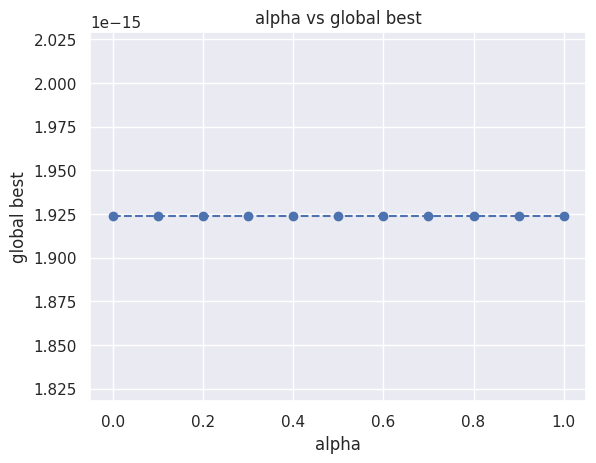

In [56]:
#alpha range 0.1 - 1 , beta =1 , rho = 0.5 , n_ants = 10 ,iterasi = 20 , n_CITY = 100
alpha = [i/10 for i in range(11)]
hasil_alpha = []
for i in alpha:
    aco_alpha= ACO(i,1,0.5,10,20,100,ruang_solusi,f12_function)
    aco_alpha.fit()
    hasil_alpha.append(aco_alpha.global_optimum)

#plot
plt.plot(alpha, hasil_alpha, linestyle='--', marker='o')
plt.xlabel("alpha")
plt.ylabel("global best")
plt.title("alpha vs global best")
plt.show()



/tmp/ipykernel_92400/1063348410.py:30: RuntimeWarning: divide by zero encountered in divide
  result = np.where(distance_float != 0, 1/distance_float, 0)


Iterasi - 1 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 2 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 3 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 4 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 5 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 6 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 7 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 8 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 9 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 10 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 11 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 12 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 13 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 14 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 15 : global optimum [0, 0] score : 1.92367069372179e-15
Iterasi - 16 : glob

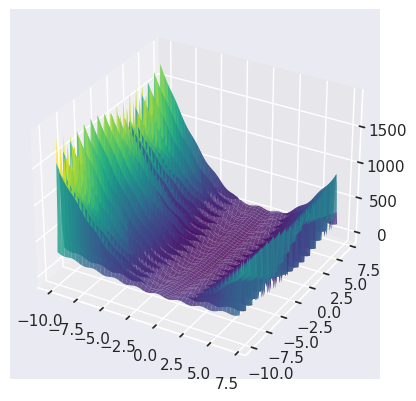

In [13]:
#animasi ACO
x = np.linspace(-10, 7, 100)
y = np.linspace(-10, 7, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([f12_function(np.array([xi, yi])) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
aco3= ACO(1,1,0.5,10,20,100,ruang_solusi,f12_function)
aco3.fit()
semut_list = [[j[i]for j in aco3.hisoty_path] for i in range(len(aco3.hisoty_path[0]) )]
semut_array = np.array(semut_list)
points = ax.scatter(semut_array[0][:, 0], semut_array[0][:, 1], [f12_function(p) for p in semut_array[0]], color='r')



def update2(frame):
    print('a')
    titik_poin = semut_array[frame]
    print(titik_poin)
    points._offsets3d = (titik_poin[:, 0], titik_poin[:, 1], [f12_function(p) for p in titik_poin])
    return points,

ani = FuncAnimation(fig, update2, frames=np.arange(len(semut_array)), interval=100,)
plt.show()